# Titanic Competition Survival Prediction



![](https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

source : https://en.wikipedia.org/wiki/Sinking_of_the_Titanic


## 👋💻 

### **Hi there!😄 I am new to data science and this is my try on the titanic dataset. Feel free to comment if you have any questions, insights or advice on this or any data science related :) Upvote if you find my work useful for you! Thank you!**

### Table of Contents

# **<span style="color:#6daa9f;">1. IMPORT LIBRARY & PACKAGES </span>**


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#split train and test set
from sklearn.model_selection import train_test_split

#sklearn model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


# **<span style="color:#6daa9f;">2. LOAD DATASET </span>**


In [2]:
train = pd.read_csv('../input/titanic/train.csv')

test = pd.read_csv('../input/titanic/test.csv')

datas = [train,test]

passengerid = test['PassengerId']

First 5 rows of training data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First 5 rows of test data

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **<span style="color:#6daa9f;">3. EXPLORATORY DATA ANALYSIS (EDA) </span>**

- Data Exploration
- Data Visualization
- Data Cleaning

In [5]:
#identify column names,data type and dataset shape

print(np.shape(train))
print(train.columns.tolist())


(891, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Now we know that the shape of the **train dataset** is 12 column and 891 rows

The column names also can be seen clearer upon the above codes

Let's familiarize with the important detail of each column of the dataset

* Survived - Survival of the passenger 0 as No and 1 as Yes (int64)
* Pclass - the ticket class which have 3 values 1 - 1st, 2- 2nd, 3 -rd (int64)
* Sex - gender of the passenger (male/ female) (object)
* Age - age in years(int64)
* sibsp - the number of sibling or spouse on board (int64)
* parch - the number of parents or child on board (int 64)
* Embarked - the port of embarkation -cherbourg,queenstown,southampton (object)

**Categorical Column:**
Name,Pclass,sex

**Numerical Column:**
Age,sibsp,parch,Fare

**String Column:**
Embarked, sex, Cabin

In [7]:
#identify column names,data type and dataset shape

print(np.shape(test))
print(test.columns.tolist())

(418, 11)
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [8]:
#summary of variables in data
print(train.describe())



       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


From the describe method we can obtain few interesting information regarding the statistical detail of the data 
- Only 38.3% passengers survived 
- The mean age of the passengers is 30 years old while the median is 28 years old
- The oldest passenger is 80 years old while the youngest is 0 years old

In [9]:
#summary of variables in data
print(test.describe())


       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


### Identifying missing values in dataset

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From here we can see that in our train data, 3 columns contains missing values which are cabin,embarked and age column


In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing values in test data is a bit different from train data
-missing values in cabin,fare and age

### Handling Missing Values 

- remove column cabin - missing values almost 77 percent of the data
- age column with be handle using imputation by having the missing values filled with the age median
- missing value for fare in test data with filled with mean value for fare
- embarked which means the place of that the passenger embarked from we will use mode to fill in missing value

I will also remove the column PassengerId,ticket and cabin as it does not relate to the survival of a passenger

In [12]:
for data in datas:
    
    data['Age'].fillna(value= data['Age'].median(),inplace=True)
    data['Embarked'].fillna(value = data['Embarked'].mode()[0],inplace = True)
    data['Fare'].fillna(value = data['Fare'].mean(),inplace = True)
    data.drop(['Cabin','Ticket','PassengerId'],axis=1,inplace=True)

## Data Visualization

Visualizing Data to view trends and produce more insights on the data

**Sex feature**

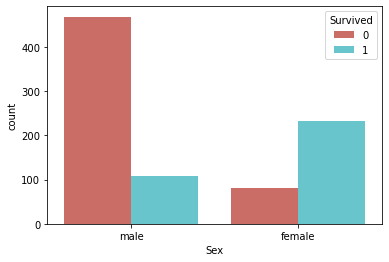

Sex       female  male
Survived              
0             81   468
1            233   109


In [13]:
#sex feature by survival

sns.countplot(x="Sex", data=train, hue="Survived",palette="hls") 
plt.show()
print(pd.crosstab(train['Survived'],train['Sex']))

Apparently female have higher survival count than the male.

**Pclass Feature**

Pclass feature which have value of 1,2,3 represents a social status in the ship therefore we can see if people in higher class have higher survived than the lower ones

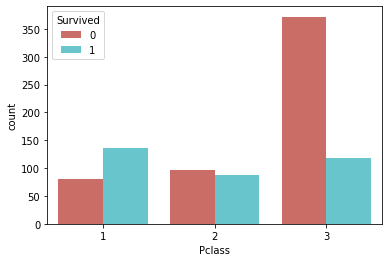

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [14]:
#Pclass feature by survival

sns.countplot(x="Pclass", data=train, hue="Survived",palette="hls") 
plt.show()
print(pd.crosstab(train['Survived'],train['Pclass']))

From here we can see that passenger in first class have the highest survive count than other classes which followed by 3rd class and second class

It is important that we ensure that our values are all in numerics therefore I am mapping strings values in column to numeric so that the model can interpret the data

In [15]:

for data in datas:
    #map each Sex value to a numerical value
    sex_mapping = {"male": 1, "female": 0}
    data['Sex'] = data['Sex'].map(sex_mapping)
    
    #map each embarked value to a numerical value
    embark_mapping = {"S": 1, "C": 2,"Q":3}
    data['Embarked'] = data['Embarked'].map(embark_mapping)

**Name Feature**

> Name column can be considered important in the prediction as we can assume that people with higher titles and positions are more likely to be saved and survived during an incident

In [16]:
for data in datas:
    
    data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
print(train['Title'].value_counts())
test['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Capt          1
Lady          1
Countess      1
Jonkheer      1
Sir           1
Mme           1
Ms            1
Name: Title, dtype: int64


Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

Above we can see many titles and their occurrences in the data

- I will combine certain titles from the unique values we have seen and group them so that the title for groups will be only be a few signifficant ones
- The title group will then be converted to numeric as to a format that can be feed to our model


In [17]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}

for data in datas:
    
    data['Title'] = data['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    data['Title'] = data['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
   

**Title Feature**

Let's see if people with different title effects their survival during the sinking

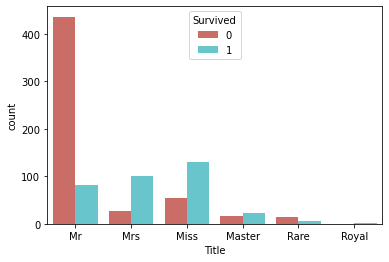

Title     Master  Miss   Mr  Mrs  Rare  Royal
Survived                                     
0             17    55  436   26    15      0
1             23   130   81  100     6      2

The Probability of Survival according to title
Title
Master    0.575000
Miss      0.702703
Mr        0.156673
Mrs       0.793651
Rare      0.285714
Royal     1.000000
Name: Survived, dtype: float64


In [18]:
#Pclass feature by survival

sns.countplot(x="Title", data=train, hue="Survived",palette="hls") 
plt.show()
print(pd.crosstab(train['Survived'],train['Title']))
print('\nThe Probability of Survival according to title')
print(train.groupby('Title')['Survived'].mean())

Interesting findings we have here..

- Women and children have the highest survival probability 
- Passenger with the title royal are all saved although there are only 2 of them in the ship (make sense)

In [19]:
#map title value to numeric
    
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)


In [20]:
print(train.isnull().sum())
test.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64


Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

### Correlation Matrix

We use it to measure correlation of two numerical variables to find an insight about their relationships. On a dataset with many attributes, the set of correlation values between pairs of its attributes form a matrix which is called a correlation matrix.

So we will use the correlation matric to find insight about their relationships, since we have changed all our column to numeric therefore we can now draw some insights from this 

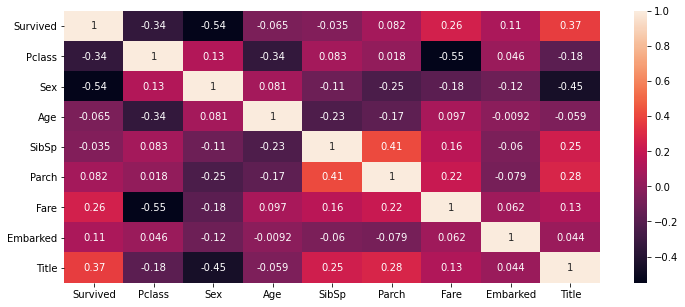

In [21]:
#correlation matrix
plt.figure(figsize=(12,5))
corrMatrix = train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


Note: Lighter color represents positive correlation, darker color represents negative correlation

Insights we can draw from the matrix :

1. Survived and Sex feature have high negative correlation
2. Title have high positive correlation with survived
3. Pclass feature have second highest negative correlation with the survival
4. Features that have high correlation with survival are sex, Pclass, Fare, Embarked and Title

Basically all of the features in the data are helpful in determining the survival of a passenger 

# **<span style="color:#6daa9f;">CHOOSE BEST MODEL </span>**


Split training data

In [22]:
predictors = train.drop(['Survived','Name'], axis=1)
target = train["Survived"]
X_train, X_tests, y_train, y_tests = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

from sklearn.preprocessing import StandardScaler
#sc_x = StandardScaler()
#X_train = sc_x.fit_transform(X_train) 

Test Models

* Naive Bayes
* Random Forest
* Logistic Regression
* SVM
* Decision Trees

In [23]:
#gaussian naive bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_tests)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
acc_naivebayes = metrics.accuracy_score(y_tests, y_pred)*100
print("Gaussian Naive Bayes model accuracy(in %):",acc_naivebayes )

Gaussian Naive Bayes model accuracy(in %): 78.68020304568529


[[100  24]
 [ 17  56]]
Logistic Regression model Accuracy :  79.19


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


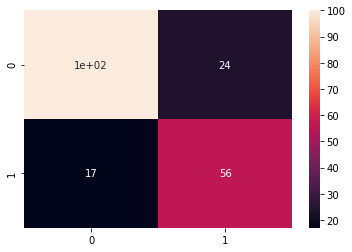

In [24]:
#logistic regression 

classifier = LogisticRegression(random_state = 22)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_tests)

cm = confusion_matrix(y_tests, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

acc_logisticregression = round(accuracy_score(y_pred, y_tests) * 100, 2)
print ("Logistic Regression model Accuracy : ", acc_logisticregression) 

In [25]:
#random forest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_tests)

acc_randomforest = round(accuracy_score(y_pred, y_tests) * 100, 2)
print("Random Forest Model Accuracy : ",acc_randomforest)


Random Forest Model Accuracy :  81.73


In [26]:
#SVM Classifier

from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_tests)

acc_SVM = round(accuracy_score(y_pred, y_tests) * 100, 2)
print("SVM Model Accuracy : ",acc_SVM)


SVM Model Accuracy :  79.19


The model with the best accuracy goes to random forest

Predict Passenger Survival Using chosen model using test data 

In [27]:
X_test = test.drop(['Name'], axis=1)
predictions = model.predict(X_test)

In [28]:
output = pd.DataFrame({'PassengerId': passengerid, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
